In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from data_loader import load_data
import polars as ps
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
load_data("shivachandel/kc-house-data", "../Data")
df = ps.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

## Data exploration

In [ ]:
df.head()

In [ ]:
df = df.drop(["id", "date"])
df.head()

In [ ]:
df.describe()

In [ ]:
df = df.with_columns(df["sqft_above"].fill_null(strategy="mean"))
df["sqft_above"].null_count()

In [ ]:
correlation = df.corr()

In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="coolwarm")

In [ ]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

In [ ]:
correlation = correlation.to_numpy()
np.fill_diagonal(correlation, 0)
correlation

In [ ]:
most_representative_column = df.columns[np.argmax(correlation[:, 0])]
most_representative_column

In [ ]:
sns.relplot(data=df, x=most_representative_column, y="price")

## Prepare independent variable

In [ ]:
x = df[most_representative_column].to_numpy().reshape(-1, 1)
y = df["price"].to_numpy().reshape(-1, 1)
x.shape, y.shape

## Split train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Train the model

In [ ]:
reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [ ]:
model.coef_, model.intercept_

### Evaluate the model

In [ ]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

In [2]:
load_data("shivachandel/kc-house-data", "../Data")
df = ps.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


## Data exploration

In [3]:
df.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
i64,str,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
7129300520,"""20141013T000000""",221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,"""20141209T000000""",538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,"""20150225T000000""",180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,"""20141209T000000""",604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,"""20150218T000000""",510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df.drop(["id", "date"])
df.head()

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

statistic,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21611.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
"""std""",367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
"""min""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
"""25%""",321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
"""50%""",450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
"""75%""",645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
"""max""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0


In [6]:
df = df.with_columns(df["sqft_above"].fill_null(strategy="mean"))
df["sqft_above"].null_count()

0

In [7]:
correlation = df.corr()

<Axes: >

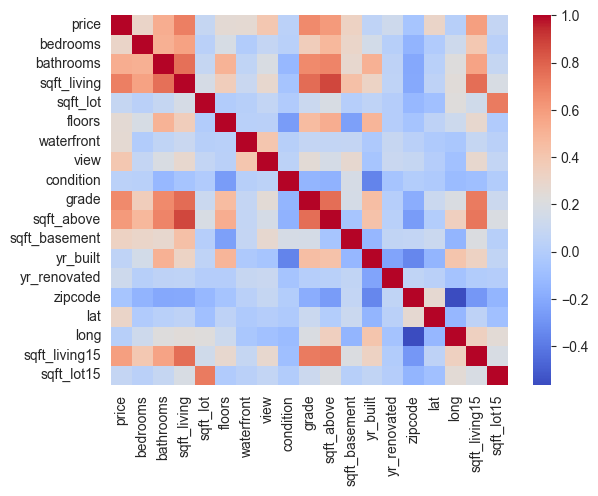

In [8]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="coolwarm")

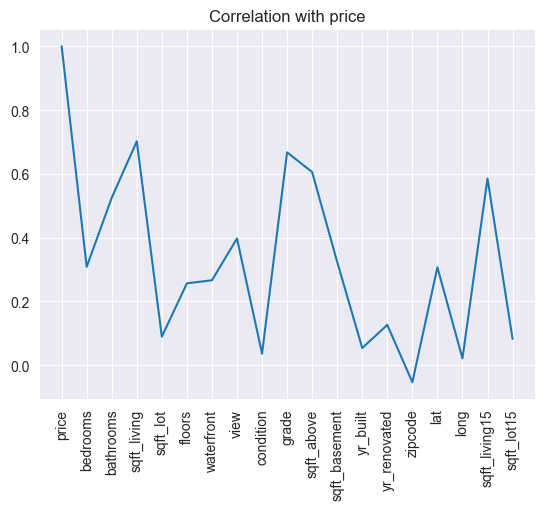

In [9]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

In [10]:
correlation = correlation.to_numpy()
np.fill_diagonal(correlation, 0)
correlation

array([[ 0.00000000e+00,  3.08349598e-01,  5.25137505e-01,
         7.02035055e-01,  8.96608606e-02,  2.56793888e-01,
         2.66369434e-01,  3.97293488e-01,  3.63617891e-02,
         6.67434256e-01,  6.05565211e-01,  3.23816021e-01,
         5.40115315e-02,  1.26433793e-01, -5.32028543e-02,
         3.07003480e-01,  2.16262410e-02,  5.85378904e-01,
         8.24471525e-02],
       [ 3.08349598e-01,  0.00000000e+00,  5.15883638e-01,
         5.76670693e-01,  3.17032429e-02,  1.75428935e-01,
        -6.58247867e-03,  7.95318518e-02,  2.84721044e-02,
         3.56966725e-01,  4.77609526e-01,  3.03093375e-01,
         1.54178069e-01,  1.88408231e-02, -1.52668487e-01,
        -8.93100969e-03,  1.29472975e-01,  3.91637524e-01,
         2.92442236e-02],
       [ 5.25137505e-01,  5.15883638e-01,  0.00000000e+00,
         7.54665279e-01,  8.77396615e-02,  5.00653173e-01,
         6.37436291e-02,  1.87737024e-01, -1.24981933e-01,
         6.64982534e-01,  6.85326198e-01,  2.83770034e-01,
    

In [11]:
most_representative_column = df.columns[np.argmax(correlation[:, 0])]
most_representative_column

'sqft_living'

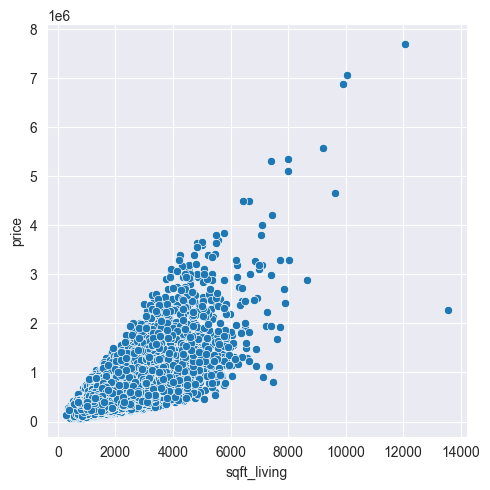

In [12]:
sns.relplot(data=df, x=most_representative_column, y="price")

## Prepare independent variable

In [13]:
x = df[most_representative_column].to_numpy().reshape(-1, 1)
y = df["price"].to_numpy().reshape(-1, 1)
x.shape, y.shape

((21613, 1), (21613, 1))

## Split train and test data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Train the model

In [15]:
reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [16]:
model.coef_, model.intercept_

(array([[281.35472549]]), array([-45186.52646568]))

### Evaluate the model

In [17]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 174467.05538789905 MSE: 65116216718.96832 RMSE: 255178.79363099183 R^2 0.4916860456482738


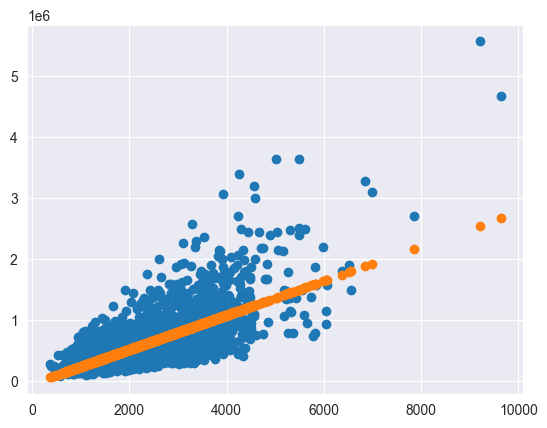

In [18]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)